# Wrangling and Analyze Data

# # Table of content
- Gather
- Access
- Note 
- Cleaning Data
- Analyzing and Visualizing Data


Importing requsite libraries for this project:

In [1]:
#Loading libraries

import pandas as pd
import numpy as np
import requests
import zipfile
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
plt.style.use('bmh')
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS
import requests
import numpy as np
%matplotlib inline

## Gather
Importing the twitter_archives csv file, into a pandas dataframe :

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Download Image Prediction Data

In [5]:
# import and saving Data programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# save to .tsv file
with open('image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# read the image prediction file and save to pandas DataFrame
image_pred = pd.read_csv('image-predictions-3.tsv',sep='\t')

# check for the data top 5 rows
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [9]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Reading in a tsv file containing the breed predictions derived from all the dog images in the tweets :

Using this approach since my twitter developer account is pending approval.

- The following code is the Twitter API code supported by Udacity.
- The data that should be gathered by the code below but i will make use of resources by Udacity as zip file

In [10]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [11]:
# extract the file from the zipfile
with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()

# check for the extracted file
z_tweets.namelist()

['tweet-json copy']

In [12]:
# read the file in DataFrame
with open('tweet-json copy', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
tweet_json.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
# check for the columns names 
tweet_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [14]:
# selecting columns of interest : 'id', 'favorite_count','retweet_count'
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]

# check for the top 5 rows
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assess

- We have Three datasets now namely: twitter_archive , img_pred and tweet_json
- First let's display one by one for visual assessing

In [15]:
# display twitter archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
# display image_pred
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
# display tweet_json
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


# Let's dive in deeper by assessing the data programmatically

In [18]:
# twitter_archive data info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
# statists of twitter archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# data sample 
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
676,789314372632018944,NaN,NaN,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,NaN,NaN,NaN,https://twitter.com/sebscat/status/78881832853...,13,10,None,None,None,None,None
940,753026973505581056,NaN,NaN,2016-07-13 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tayzie. She's a Barbadian Bugaboo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753026973...,10,10,Tayzie,None,None,None,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,None,None,None,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690959652...,11,10,None,None,None,None,None


In [21]:
# check for source column
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
# check for the dog's name font style
twitter_archive.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [23]:
# check for those written as lowercase
lowers = twitter_archive.name.loc[twitter_archive.name.str.islower()].unique()
lowers

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [24]:
# unique values of those without title
untitled = twitter_archive.name.loc[twitter_archive.name.str.istitle() == False].unique()
untitled

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [25]:
# check for those misspelled  
untitled_unlowers = [i for i in untitled if  i not in lowers]  
untitled_unlowers

['BeBe', 'DonDon', 'CeCe', 'JD', 'DayZ']

Diving deeper into columns related to rating i.e rating_numerator and rating_denominator

In [26]:
# check for denominator values below 10
pd.set_option('display.max_colwidth',-1)
twitter_archive.loc[twitter_archive.rating_denominator <10 , ['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [27]:
# check for rating denominator values > 10
twitter_archive.loc[twitter_archive.rating_denominator >10 ,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [28]:
# check for rating_numerator <10
twitter_archive.loc[twitter_archive.rating_numerator < 10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
485,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10
599,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
730,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
745,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10


In [29]:
# check for rating_numerator values > 10
twitter_archive.loc[twitter_archive.rating_numerator > 14,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,@markhoppus 182/10,182,10
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


key notes to look at:

- form the above I found some scores as outliers 1776,420 that needs more invistigate eith to include or drop
- Also those above 100 these seems to be related to more that one dogs in a photo
- some typos as 75 instead of 9.75 , 26 instead of 11.26 ,27 instead of 11.27 11/10 instead of 50/50
- some times they are using the float numbers
- The account has its own rating system and that is quiet clear here specially that rate of 14/10 looks normal
- I will collect these observations for further cleaning

In [30]:
# check for the text 
twitter_archive.text.sample(5).tolist()

['This is Cassie. She goes door to door trying to find the owner of this baguette. No luck so far. 10/10 https://t.co/e8bj97CisO',
 '"Dammit hooman I\'m jus trynna lik the fler" 11/10 https://t.co/eRZRI8OTj7',
 "This is Titan. He's trying to make friends. Offering up his favorite stick. 13/10 philanthropic af https://t.co/vhrkz0dK4v",
 "Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M",
 'This is Daisy. She has a heart on her butt. 13/10 topical af https://t.co/u6p4LxzHKg']

In [31]:
# checking inside text values for non dog related tweets
twitter_archive.text[twitter_archive.text.str.match('.*only rate dogs')]

25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp         
59      Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf 
93      I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2         
118     RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…                      
127     Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ           
131     Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 http

In [32]:
# check the expanded urls column
twitter_archive.expanded_urls.sample(5)

747     https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1
1076    https://twitter.com/dog_rates/status/739606147276148736/photo/1,https://twitter.com/dog_rates/status/739606147276148736/photo/1,https://twitter.com/dog_rates/status/739606147276148736/photo/1                                                                
112     https://twitter.com/dog_rates/status/870804317367881728/photo/1                                                                                                                                                                                                
1395    https://twitter.com/dog_rates/status/699801817392291840/photo/1,https://twitter.com/dog_rates/status/699801817392291840/photo/1,https://twitter.com/dog_rates/status/699801817392291840/photo/1,https://

-  So this sentence used by the account's admin to address that picture doesn't contain a dog!

In [33]:
# checking the number of time this issue occur?
len(twitter_archive.text[twitter_archive.text.str.match('.*only rate dogs')])

64

In [34]:
# image_pred data info
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# statistics of image_pred
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
# data sample 
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1455,777621514455814149,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1,chow,0.999823,True,Norwich_terrier,0.000056,True,Pomeranian,0.000028,True
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/779377444025499652/pu/img/eIiLDy9F6rPNarEc.jpg,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True


In [37]:
# number of dog breeds
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
teddy                        18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
Maltese_dog                  18 
beagle                       18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [38]:
# tweet_json data info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [39]:
# tweet_json statistics
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [40]:
# data sample 
tweet_json.sample(5)

,id,favorite_count,retweet_count
2,891815181378084864,25461,4328
1996,672538107540070400,1089,404
2085,670797304698376195,780,262
1927,674042553264685056,772,142
1358,703268521220972544,2152,618


In [41]:
# datasets shape and completeness
twitter_archive.shape[0], tweet_json.shape[0] , image_pred.shape[0]

(2356, 2354, 2075)

In [42]:
# duplicate columns in the three datasets
all_columns = pd.Series(list(twitter_archive ) + list(tweet_json) +list(image_pred))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

# Notes and Actions Required

# Qualiity 

twitter_archive

Missing Values :

- in_reply_to_status_id, in_reply_to_user_id : 78 instead of 2356
retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp 181 instead of 2356
expanded_urls : 2297 instead of 2356
- We are interested in the tweet ONLY not the retweet
- We are interested in the tweet ONLY not the reply to the original tweet

- tweet_id is saved as int datatype instead of/ "better to be" string (object)

- timestamp , retweeted_status_timestamp are saved as object datatype (str) instead of date/timestamp
source column is writen in html containg <a> tags
column name :

- some values are not titled untitled_unlowers ('BeBe','DonDon','CeCe',, 'JD', 'DayZ')
- some are inacuarte values : lowers ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad','an', 'very', 'just', 'my', 'his', 'actually', 'getting','this', 'unacceptable', 'all', 'old', 'infuriating', 'the','by', 'officially', 'life', 'light', 'space']
rating_numerator & rating_denominator:

datatype for rating_numerator should be float instead of int
fix:
- @45 13.5/10 instead of 5/10
- @ 313 13/10 instead of 960/0
- @ 2335 : 9/10 instead of 1/2
- @ 1068 : 14/10 instead of 9/11
- @1165: 13/10 instead of 4/20
- @ 1202 : 11/10 instead of 50/50
- @ 1662 10/10 instead of 7/11
- @ 695 : 9.75/10 instead of 75/10
- @763 : 11.27/10 instead of 27/10
- @- 1712 :11.26/10 instead of 26/10

- drop:
- @ 516 no rating
- @342 inaccurate (account start date)

- invistigate(outliers):
- @ 315 https://t.co/YbEJPkg4Ag 0/10
- @979 1776/10
- @ 1634 : https://t.co/kRK51Y5ac3 143/130
- @2074 :420/10
- @1274 names
columns doggo,floofer,pupper, puppo has None values instead of Null.
We are interested in dogs , text column reveals the truth about that some tweets are not related to dogs
expanded_urls is too bulky we are interested in tweet link only.



- image_pred

some images are not for dogs
tweet_id is saved as int datatype instead of object datatype
replace the underscore in breeds values with space and title all breeds values (p1 &p2& p3)
twitter_json

- column id is saved as int datatype instead of object datatype & rename as tweet_id
All_datasets

- we have completeness issue not all the datasets have the same number of observation

- Tidiness

twitter_archive

- text column has two variables text and short urls,create short_urls column, drop expanded_urls
The values of four columns (doggo,floofer,pupper,puppo) in twitter_archive dataset should be in one column dog_stage with a category datatype.
rating_numerator and rating_denominator columns in twitter_archive dataset should form one column dog_rating normalized out of 10.
- make new columns for day_name and month from the timstamp column

- image_pred

- Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf could be condenced to two columns dog_breed and 
 confidence


- All datasets

tweet_id is present in two datasets and after renaming it will appear in all datasets
tweet_json and image_pred datasets should be part of our main dataset twitter_archive.


#  Tidiness




twitter_archive

-  text column has two variables text and short urls,create short_urls column, drop expanded_urls

-  The values of four columns (doggo,floofer,pupper,puppo) in twitter_archive dataset should be in one column dog_stage with a category datatype.

-  rating_numerator and rating_denominator columns in twitter_archive dataset should form one column dog_rating normalized out of 10.

- make new columns for day_name and month from the timstamp column


-  image_pred

-  Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf could be condenced to two columns dog_breed and confidence



-  All datasets

-  tweet_id is present in two datasets and after renaming it will appear in all datasets

-  tweet_json and image_pred datasets should be part of our main dataset twitter_archive.




## Cleaning Data


In [43]:
# make a copy of the datasets
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean =  tweet_json.copy()

Let's start with the missing values

twitter_archive

Missing Values:

-  in_reply_to_status_id, in_reply_to_user_id : 78 rather than 2356 retweeted_status_id,
-  retweeted_status_user_id,retweeted_status_timestamp 181 rather than 2356
-  expanded_urls : 2297 rather than 2356 (to be fixed later) #### Characterize



in the twitter_archive dataset we will keep just recodrs that:
  -   Are not related with retweets.
  -   Are not related with answer to the first tweet.i.e we will save the NaN values for these segments and drop non NaN values



Drop sections:
-  in_reply_to_status_id
-  in_reply_to_user_id
-  retweeted_status_id
-  retweeted_status_user_id
-  retweeted_status_timestamp**

In [44]:
twitter_archive_clean = twitter_archive_clean.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
# drop columns
xcolumns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns = xcolumns, axis=1)

TEST

In [45]:
# check for Null values in the twitter_archive clean versions
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


# Tideness

twitter_archive

-  text column has two variables text and short urls,create short_urls column, drop expanded_urls



-  Define

-  use split method by ' ' over the text column, and apply over row
-  create short_urls column
-  drop expanded_urls column
-  split the text column by https: and assign its value to the same column name

In [46]:
# create short_urls column by use split method over the text column, and apply over row
twitter_archive_clean['short_urls'] = twitter_archive_clean.text.apply(lambda x :x.strip().split(' ')[-1])
# drop the expanded_urls
twitter_archive_clean.drop('expanded_urls', axis =1, inplace=True)
# split the text column by `https:` and assign its value to the same column name
twitter_archive_clean.text = twitter_archive_clean.text.apply(lambda x:x.split('https:')[0])

TEST

In [47]:
twitter_archive_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_urls
659,791406955684368384,2016-10-26 22:31:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Levi. He's a Madagascan Butterbop. One of the more docile Butterbops I've seen. 12/10 would give all the pets,12,10,Levi,None,None,None,None,https://t.co/Zcw9Sccctc


In [48]:
# check for column droping
assert 'expanded_urls' not in twitter_archive_clean.columns

# Tideness
-  2 twitter_archive

-  The values of four columns (doggo,floofer,pupper,puppo) in twitter_archive dataset should be in one column dog_stage with a category datatype.

# Define

-  select the last 4 segments connected with the different canine stages
-  supplant the 'None' string with np.nan in the chose segments
-  make a dog_stage segment joinig every one of the qualities in the chose values droping nan, convert to str
-  convert the dog_stage segment type to unmitigated
-  drop the segments connected with the past 4 phases

In [49]:
# select the dog stages columns from the dataset
all_dogs_type = ['doggo', 'floofer', 'pupper', 'puppo']
# replace the 'None' string with np.nan 
twitter_archive_clean[all_dogs_type] = twitter_archive_clean[all_dogs_type].replace('None', np.nan)

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean[all_dogs_type].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
twitter_archive_clean = twitter_archive_clean.drop(columns = all_dogs_type, axis =1)

TEST

In [50]:
# check for the data columns and datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
short_urls            2097 non-null object
dog_stage             336 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.9+ KB


In [51]:
# check for the values of the new column
twitter_archive_clean.dog_stage.value_counts()

pupper            221
doggo             72 
puppo             23 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

#  Quality

2 rating_numerator & rating_denominator:

-  datatype for rating_numerator should be float instead of int

Define
-  convert the datatype of rating_numerator to float by astype('float')

In [52]:
#convert the datatype of rating_numerator to float by astype('float')
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')

TEST

In [53]:
# check for the datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
short_urls            2097 non-null object
dog_stage             336 non-null category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 149.9+ KB


# Quality
-  3 rating_numerator & rating_denominator:

-  fix:
-  @45 13.5/10 instead of 5/10
-  @ 313 13/10 instead of 960/0
-  @ 2335 : 9/10 instead of 1/2
-  @ 1068 : 14/10 instead of 9/11
-  @1165: 13/10 instead of 4/20
-  @ 1202 : 11/10 instead of 50/50
-  @ 1662 10/10 instead of 7/11
-  @ 695 : 9.75/10 instead of 75/10
-  @763 : 11.27/10 instead of 27/10
-  @1712 :11.26/10 instead of 26/10


# 4 rating_numerator and rating_denominator:

drop:
-  @ 516 no appraising
-  @342 incorrect (account start date) retweets& replys are now droped



# Define

- check for the above records if exist
- get a rundown of the files of the erros after check
- set a rundown for the right qualities comparative with those files
- circle through the two records and appoint each file with the new right worth
- drop [516] by record

In [54]:
# check for index if exist
indices = [45,313,2335,1068,1165,1202,1662,695,763,1712,516,342]
for i in indices:
    if i in list(twitter_archive_clean.index):
        print('yes')
    else: 
        print(f'No : {i} ')

yes
No : 313 
yes
yes
yes
yes
yes
yes
yes
yes
yes
No : 342 


In [55]:
#get a list of the indices of the erros after check
indices = [45,2335,1068,1165,1202,1662,695,763,1712]
# set a list for the correct values relative to those indices
vals = [13.5,9,14,13,11,10,9.75,11.27,11.26]
# loop through the two lists and assign each index with the new correct value
for i,val in zip(indices,vals):
    twitter_archive_clean.loc[i, 'rating_numerator'] = val
    twitter_archive_clean.loc[i, 'rating_denominator'] =10
# drop the index: 516 
twitter_archive_clean.drop(index=516,inplace=True)

TEST

In [56]:
# test for value for one of the entries
assert twitter_archive_clean.loc[1712,'rating_numerator'] ==11.26
# test for droping index=516
assert 516 not in list(twitter_archive_clean.index)

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null object
source                2096 non-null object
text                  2096 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null int64
name                  2096 non-null object
short_urls            2096 non-null object
dog_stage             336 non-null category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 229.8+ KB


In [58]:
# check for the rating_denominator values
twitter_archive_clean.rating_denominator.value_counts()

10     2085
80     2   
50     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

# TIDENESS

rating_numerator and rating_denominator columns in twitter_archive dataset should form one column dog_rating normalized out of 10.



#  Define
divide the rating_numerator / rating_denominator and then mulitiply by 10
make dog_score column
drop the columns rating_numerator & rating_denominator column

In [59]:
#divide the rating_numerator / rating_denominator and then mulitiply by 10 & make dog_score column
twitter_archive_clean['dog_score'] = 10 * twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator
#drop the columns rating_numerator & rating_denominator column
twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

TEST

In [60]:
# check for values in the dog_score column
twitter_archive_clean.dog_score.value_counts()

12.00      490
10.00      438
11.00      419
13.00      288
9.00       154
8.00       98 
7.00       51 
14.00      39 
5.00       33 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
9.75       1  
0.00       1  
11.26      1  
11.27      1  
13.50      1  
420.00     1  
1776.00    1  
Name: dog_score, dtype: int64

In [61]:
# check for the twitter_archive_clean data
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id      2096 non-null int64
timestamp     2096 non-null object
source        2096 non-null object
text          2096 non-null object
name          2096 non-null object
short_urls    2096 non-null object
dog_stage     336 non-null category
dog_score     2096 non-null float64
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 213.4+ KB


#  Quality

-  5 fix the tweet_id columns in all datasets


# Define
-  rename the id column in twitter_json to tweet_id
-  change the datatype to str(object) for tweet_id column in all datasets

In [62]:
# rename the id column in twitter_json to tweet_id
tweet_json_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

# change the datatype to str(object) in all datasets
datasets = [twitter_archive_clean,image_pred_clean,tweet_json_clean]
for i in datasets:
    i.tweet_id = i.tweet_id.astype('object')

TEST

In [63]:
# check for the datatypes for tweet_id in all datasets
for i in datasets:
    assert i.tweet_id.dtypes == 'object'

# TIDENESS
- image_pred dataset condence the columns p1,p1_dog_p1_conf,...etc to dog_breed, confidence

- we are interested in images of dogs only
- we are are going to select those have at least one prediction for dog among the top three prediction
- rename the No breed values with np.nan
- replace the underscore with space and title all breeds values




# Define
-  define a dog_breed_confidence function to extract the dog_breed and confience from the top 3 predictions
-  apply the function row wise
-  assign the new column names dog_breed and confidence
-  drop the un needed columns now

# Quality issues Now:


# Define
-  rename the No breed values with np.nan
- replace the underscore with space and title all breeds values

In [64]:
breed = []
confidence = []

# define the function
def dog_breed_confidence(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence.append(data.p1_conf)
    elif data.p2_dog:
        breed.append(data.p2)
        confidence.append(data.p2_conf)
    elif data.p3_dog :
        breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        breed.append('No breed')
        confidence.append(0)
# apply the function row wise        
image_pred_clean.apply(dog_breed_confidence,axis =1)
# assign the new column names
image_pred_clean['dog_breed'] = breed
image_pred_clean['confidence'] = confidence
# drop the un needed columns now
image_pred_clean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)
# rename the No breed values with np.nan
image_pred_clean.replace('No breed',np.nan, inplace=True)
# replace the underscore with space and title all breeds values
image_pred_clean.dog_breed= image_pred_clean.dog_breed.str.replace('_',' ').str.title()

TEST

In [65]:
# check the top 5 rows in image_pred_clean
image_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311


# Tideness
- 5 tweet_json and image_pred datasets should be part of our main dataset twitter_archive.

- we are interested in the retweet_count and favorite_count from tweet_json and keeping the original data
- we are interested in the tweets that have images

# Define

- use the merge function to merge twitter_archive_clean and tweet_json_clean on tweet_id column (left join)
- use the merge function to merge twitter_archive_clean and image_pred_clean on tweet_id column (inner join)
- make the master dataset

In [66]:
# use the merge function to merge twitter_archive_clean and tweet_json_clean on tweet_id column (left join)
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean , how = 'left' , on = 'tweet_id')


In [67]:
twitter_archive_clean['tweet_id']=image_pred_clean['tweet_id'].astype(int)

In [68]:
# use the merge function to merge `twitter_archive_clean` and `image_pred_clean` on tweet_id column (inner join) 
# and make master dataset
master_dataset = pd.merge(twitter_archive_clean, image_pred_clean , how = 'inner' , on = 'tweet_id')


TEST

In [69]:
# check new dataset after merge 
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1349
Data columns (total 14 columns):
tweet_id          1350 non-null float64
timestamp         1350 non-null object
source            1350 non-null object
text              1350 non-null object
name              1350 non-null object
short_urls        1350 non-null object
dog_stage         208 non-null category
dog_score         1350 non-null float64
favorite_count    1350 non-null int64
retweet_count     1350 non-null int64
jpg_url           1350 non-null object
img_num           1350 non-null int64
dog_breed         1140 non-null object
confidence        1350 non-null float64
dtypes: category(1), float64(3), int64(3), object(7)
memory usage: 149.3+ KB


In [70]:
# check that all records have an image
master_dataset.jpg_url.isnull().sum()

0

# Quality
-  6 source column is writen in html containg <a> tags


#  Define
-  check for the unique values in source columns to know how to extract the needed value
-  make a function fix_source which extract the strings between tags (>text<)
-  use apply function to fix the source column row wise

In [71]:
# check for the unique values
master_dataset.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [72]:
#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in twitter_archive_clean dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [73]:
# use apply function to fix the source column row wise
master_dataset.source= master_dataset.source.apply(lambda x: fix_source(x))

TEST

In [74]:
# check for the result values in the source column
master_dataset.source.value_counts()

Twitter for iPhone     1260
Vine - Make a Scene    60  
Twitter Web Client     22  
TweetDeck              8   
Name: source, dtype: int64

# Quality
-  7 timestamp is saved as object datatype (str) instead of date/timestamp

# Define
- change the datatype of timestamp column to datetime

In [75]:
# change the datatype of timestamp column to datetime 
master_dataset.timestamp = pd.to_datetime(master_dataset.timestamp)

TEST

In [76]:
# check for the datatype
master_dataset.timestamp.dtype

dtype('<M8[ns]')

#   Tideness
-  6 make new columns for day_name and month for more analysis

# Define
-  extract the month name from the timestamp column
-  extract the day name from the timestamp column

In [77]:
# extract the month name
master_dataset['month'] = master_dataset.timestamp.apply(lambda x: x.month_name())
#extarct the day_name
master_dataset['day_name'] = master_dataset.timestamp.apply(lambda x: x.day_name())

TEST

In [78]:
# check for the top 5 rows in columns timestamp, day_name and month
master_dataset.loc[:5,['timestamp','day_name','month']]

,timestamp,day_name,month
0,2017-08-01 00:17:27,Tuesday,August
1,2017-07-30 15:58:51,Sunday,July
2,2017-07-28 16:27:12,Friday,July
3,2017-07-27 16:25:51,Thursday,July
4,2017-07-26 15:59:51,Wednesday,July
5,2017-07-25 16:11:53,Tuesday,July


In [79]:
# chheck for the datatypes
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1349
Data columns (total 16 columns):
tweet_id          1350 non-null float64
timestamp         1350 non-null datetime64[ns]
source            1350 non-null object
text              1350 non-null object
name              1350 non-null object
short_urls        1350 non-null object
dog_stage         208 non-null category
dog_score         1350 non-null float64
favorite_count    1350 non-null int64
retweet_count     1350 non-null int64
jpg_url           1350 non-null object
img_num           1350 non-null int64
dog_breed         1140 non-null object
confidence        1350 non-null float64
month             1350 non-null object
day_name          1350 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 210.4+ KB


# Quality
-  7 column name :

-  rename to dog_name
-  some values are not titled untitled_unlowers ('BeBe','DonDon','CeCe',, 'JD', 'DayZ')
-  some are inacuarte values : lowers ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad','an', 'very', 'just', 'my', 'his', 'actually', 'getting','this', 'unacceptable', 'all', 'old', 'infuriating', 'the','by', 'officially', 'life', 'light', 'space']


# Define
-  rename the column to dog_name
-  converted lower names to np.nan
-  make all values titled
-  relace 'None' values with np.nan values

In [80]:
# rename the name column to dog_name
master_dataset.rename(columns={'name':'dog_name'},inplace=True)
# converted lower names to np.nan
lowers = master_dataset.dog_name.str.islower()
master_dataset.loc[lowers,'dog_name'] = 'None'
# make all values titled
master_dataset.dog_name = master_dataset.dog_name.apply(lambda x: x.title())
# relace 'None' with np.nan values
master_dataset.dog_name.replace('None', np.nan, inplace= True)

TEST

In [81]:
# check for all is titled
master_dataset.dog_name.str.istitle().value_counts()

True    911
Name: dog_name, dtype: int64

In [82]:
# assert for our work
assert [i.title() in master_dataset.dog_name.unique() for i in untitled_unlowers]
assert [i in master_dataset.dog_name.unique() for i  in lowers]
assert 'dog_name' in master_dataset.columns

In [83]:
# check for dog_name frequencies
master_dataset.dog_name.value_counts()

Charlie      9
Oliver       8
Lucy         7
Tucker       7
Daisy        7
Stanley      6
Bo           6
Bailey       6
Bentley      5
Jax          5
Oscar        5
Leo          5
Sadie        5
Sammy        4
Toby         4
Louis        4
Cassie       4
Rusty        4
Winston      4
Lola         4
Scooter      4
Reggie       4
Phil         4
Finn         4
Cooper       4
Carl         3
Penny        3
Maggie       3
Jerry        3
Boomer       3
            ..
Maude        1
Ralphy       1
Rorie        1
Berb         1
Napolean     1
Hercules     1
Bode         1
Emanuel      1
Ember        1
Mister       1
Hobbes       1
Romeo        1
Cuddles      1
Jd           1
Rey          1
Mike         1
Lorenzo      1
Harry        1
Kona         1
Davey        1
Kilo         1
Kenzie       1
Harnold      1
Meyer        1
Kyro         1
Jebberson    1
Monkey       1
Dunkin       1
Darla        1
Fabio        1
Name: dog_name, Length: 667, dtype: int64

In [84]:
# check for data names
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1349
Data columns (total 16 columns):
tweet_id          1350 non-null float64
timestamp         1350 non-null datetime64[ns]
source            1350 non-null object
text              1350 non-null object
dog_name          911 non-null object
short_urls        1350 non-null object
dog_stage         208 non-null category
dog_score         1350 non-null float64
favorite_count    1350 non-null int64
retweet_count     1350 non-null int64
jpg_url           1350 non-null object
img_num           1350 non-null int64
dog_breed         1140 non-null object
confidence        1350 non-null float64
month             1350 non-null object
day_name          1350 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 170.4+ KB


# Quality
-  8 We are interested in dogs , text column reveals the truth about that some tweets are not related to dogs

# Define
-  check for the text column for only rate dogs as it is used by the account admin to address that photo is not a dog
-  confirm that has no name in dog_name column
-  drop the rows that contains this text using their indices

In [85]:
# check for the text column for only rate dogs in text and null value for dog_name
not_dogs = master_dataset.loc[master_dataset.dog_name.isnull()& master_dataset.text.str.match('.*only rate dogs')]
# check for number of records
len(not_dogs)

39

In [86]:
# explore data
not_dogs

,tweet_id,timestamp,source,text,dog_name,short_urls,dog_stage,dog_score,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence,month,day_name
16,6.663533e+17,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof,NaN,https://t.co/4Ad1jzJSdp,NaN,12.0,31061,6167,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1,Malamute,0.336874,July,Tuesday
35,6.670441e+17,2017-06-30 19:35:32,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10,NaN,https://t.co/WiAMbTkDPf,NaN,12.0,21734,3989,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,Golden Retriever,0.765266,June,Friday
56,6.674910e+17,2017-06-12 00:15:36,Twitter for iPhone,"I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10",NaN,https://t.co/pwY9PQhtP2,NaN,12.0,23134,4125,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,Borzoi,0.852088,June,Monday
78,6.679114e+17,2017-05-23 16:16:06,Twitter for iPhone,"Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10",NaN,https://t.co/M5Rz0R8SIQ,NaN,13.0,33420,8425,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,NaN,0.000000,May,Tuesday
83,6.681907e+17,2017-05-17 16:00:15,Twitter for iPhone,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10,NaN,https://t.co/wr3xsjeCIR,NaN,14.0,33651,9361,https://pbs.twimg.com/media/CUXj4SgXAAETlu6.jpg,1,Blenheim Spaniel,0.958402,May,Wednesday
92,6.682920e+17,2017-05-10 00:08:34,Twitter for iPhone,We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10,NaN,https://t.co/nvZyyrp0kd,NaN,13.0,66437,21840,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,NaN,0.000000,May,Wednesday
100,6.685678e+17,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10,NaN,https://t.co/g2nSyGenG9,NaN,12.0,75193,25661,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,May,Tuesday
112,6.688261e+17,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective",NaN,https://t.co/Xc7uj1C64x,NaN,12.0,31657,8987,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,Malinois,0.640185,April,Friday
143,6.696259e+17,2017-03-25 16:45:08,Twitter for iPhone,"C'mon guys. Please only send in dogs. We only rate dogs, not Exceptional-Tongued Peruvian Floor Bears. Thank you... 12/10",NaN,https://t.co/z30iQLiXNo,NaN,12.0,27154,5365,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,Golden Retriever,0.055408,March,Saturday
219,6.715339e+17,2017-01-31 01:27:39,Twitter for iPhone,We only rate dogs. Please don't send in any more non-dogs like this Wild Albanian Street Moose. Thank you... 11/10,NaN,https://t.co/srXL2s868C,NaN,11.0,14614,2965,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,NaN,0.000000,January,Tuesday


In [87]:
# collect indices
#indices = master_dataset.loc[master_dataset.dog_name.isnull()& master_dataset.text.str.match('.*only rate dogs')].index.tolist()

# drop the rows master_dataset.index[indices]
master_dataset.drop(not_dogs.index,axis= 0,inplace=True)

TEST

In [88]:
# check for only rate dogs if still exists
len(master_dataset.loc[master_dataset.dog_name.isnull()& master_dataset.text.str.match('.*only rate dogs')])

0

In [89]:
# check the new shape
master_dataset.shape

(1311, 16)

In [90]:
# check for else
master_dataset.loc[master_dataset.text.str.match('.*only rate dogs'),['text','dog_name']]

,text,dog_name
1001,"Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10",Sammy



# Check for Outliers

In [91]:
master_dataset[master_dataset.dog_score >14]

,tweet_id,timestamp,source,text,dog_name,short_urls,dog_stage,dog_score,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence,month,day_name
1199,8.344581e+17,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10,NaN,https://t.co/yfAAo1gdeY,NaN,420.0,7989,4324,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,1,Rhodesian Ridgeback,0.468619,November,Sunday


-  It appears to be that we have amusing anomalies here the Atticuss gets the most elevated score in festival of Indenpence day, so the score here connected with the occassion and his dress

-  The subsequent one is likewise an interesting joke as this isn't a pic of a genuine canine, this vocalist moniker is sneak homeboy #### Define

- So we will drop these exceptions #### Code

In [92]:
# drop outliers
outliers = master_dataset[master_dataset.dog_score >14].index.tolist()
master_dataset.drop(outliers,axis = 0, inplace=True)

TEST

In [93]:
# check for the master data shape
master_dataset.shape

(1310, 16)

In [94]:
master_dataset[master_dataset.dog_score>14]

,tweet_id,timestamp,source,text,dog_name,short_urls,dog_stage,dog_score,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence,month,day_name


# My Final Checks on the Tidying Master Dataset

In [95]:
#check for the final master
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1349
Data columns (total 16 columns):
tweet_id          1310 non-null float64
timestamp         1310 non-null datetime64[ns]
source            1310 non-null object
text              1310 non-null object
dog_name          911 non-null object
short_urls        1310 non-null object
dog_stage         208 non-null category
dog_score         1310 non-null float64
favorite_count    1310 non-null int64
retweet_count     1310 non-null int64
jpg_url           1310 non-null object
img_num           1310 non-null int64
dog_breed         1106 non-null object
confidence        1310 non-null float64
month             1310 non-null object
day_name          1310 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 165.4+ KB


# Store Data

TEST

In [96]:
# Store the data after combinig and cleaning 
master_dataset.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

## Analyzing and Visualizing Data


-  In this section,I analyze and visualize the
wrangled data.

# 1- What's the most source used by followers to share their dog's nice photo ?

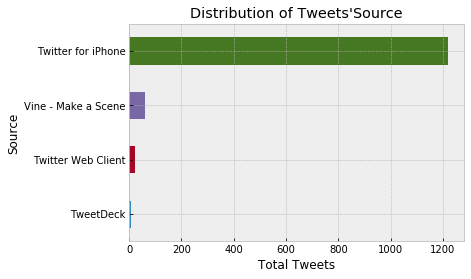

In [97]:
plt.title("Distribution of Tweets'Source")
master_dataset.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

In [98]:
# percentage of sources
master_dataset.source.value_counts() / master_dataset.source.value_counts().sum()

Twitter for iPhone     0.931298
Vine - Make a Scene    0.045802
Twitter Web Client     0.016794
TweetDeck              0.006107
Name: source, dtype: float64

# -  It is clear from the above that Twitter app in Iphone has the most share 93% which is better explained by :

-  The ease of use to take a shot for a dog from the app
-  The high resolution of cameras.

# 2 Which is the most popular day/month to post a dog photo?

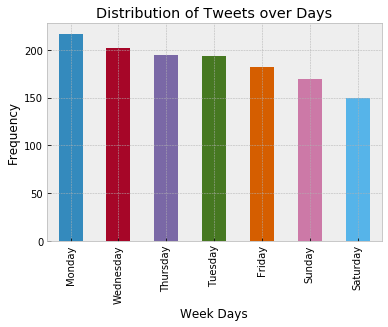

In [99]:
master_dataset.day_name.value_counts().plot('bar')
plt.title("Distribution of Tweets over Days")
plt.xlabel('Week Days')
plt.ylabel('Frequency');

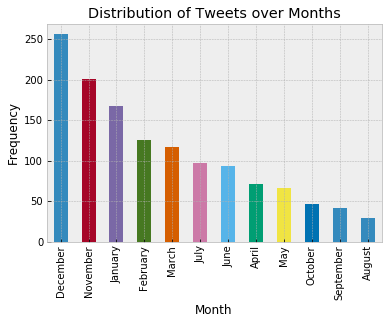

In [100]:
master_dataset.month.value_counts().plot('bar')
plt.title("Distribution of Tweets over Months")
plt.xlabel('Month')
plt.ylabel('Frequency');

# Clearly individuals will quite often post their dogs photographs in Monday/December

-  Curiously, most day is Monday, may show that the greater part of devotees is out of pressure (might be not laborers)
-  The top month is December may deciphered as the hour of Christmas and New Year get-aways, so individuals will in general go out with their canines and make efforts

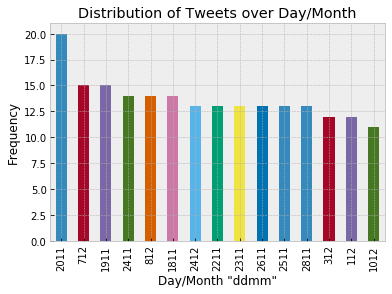

In [101]:
# select the month and day from timestamp e.g 01/07 will be 107
master_dataset.timestamp.apply(lambda x:  x.day*100 + x.month ).value_counts().sort_values(ascending =False)[:15].plot('bar')
plt.title("Distribution of Tweets over Day/Month")
plt.xlabel('Day/Month "ddmm"')
plt.xticks(rotation = 90)
plt.ylabel('Frequency');

# The most widely recognized Day/Month in our example dataset demonstrate that most presents related on the finish of November , which is coordinating with Thanksgiving Holidays, as it comes at the Fourth Thursday of November after that Black Fridays which is likewise an occasion

# 3 Which is the most common dog name?

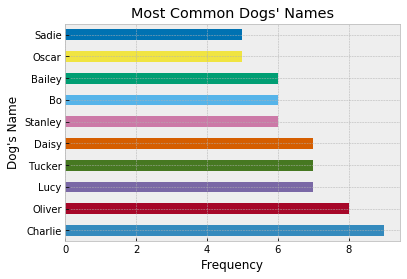

In [102]:
# rank the names frequency in a descending order
master_dataset.dog_name.value_counts().sort_values(ascending =False)[:10].plot('barh')
plt.title("Most Common Dogs' Names")
plt.xlabel('Frequency')
plt.ylabel("Dog's Name");

# It is clear enough, that most utilized Dog name in our dataset is Charlie, trailed by Oliver and Lucy.!. As most people tend to use real names often

# 4 How do @WeRateDogs account rate dogs?

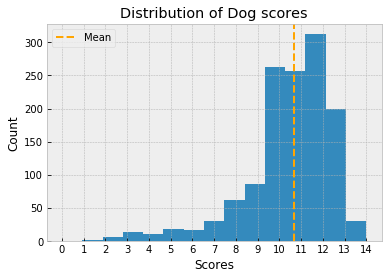

In [103]:
# histogram for the dog score
master_dataset.dog_score.hist(bins=15)
plt.title('Distribution of Dog scores')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.axvline(x= master_dataset.dog_score.mean(),color='orange', linestyle='--',label ='Mean')
plt.xticks(np.arange(15))
plt.legend(loc=0);

In [104]:
# descriptive stats
master_dataset.dog_score.describe()

count    1310.000000
mean     10.685885  
std      2.180829   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: dog_score, dtype: float64

# We can notice from the above plot that the most frequent score is arround 12, and the maximun is 14

- Albeit the rating framework for the record is/10 yet really the normal rating is 10.68!
-  One of the most reasons for this record poularity they will generally give higher scores i.e over 10, Brent was correct!

# 5. Which is the most common breed?

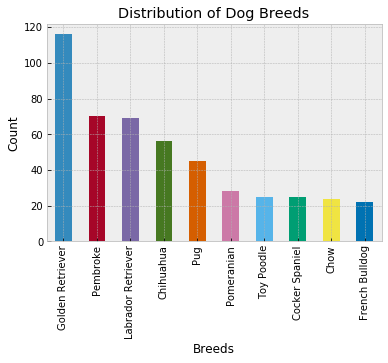

In [105]:
# frequency for dog breeds
master_dataset.dog_breed.value_counts()[:10].plot('bar')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count');

# Here, The most well-known breed in our example is Golden Retriever

condition:

-  The varieties information contains a ton of invalid qualities
Likewise to think about that this information is given by a neural network model

# Resources
Stackoverflow : delete list of rows in pandas
DOCS: Get the name of the day in pandas
Conditional replace
Outliers :Independence Day)
Outliers: Snoop dogg
Holidays

# ## Refrence 

Mohamed Hindam 